In [6]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt

# Paths
json_path = "/scratch/zw2526/workspace/ChartQA/ChartQA Dataset/test/test_human.json"
png_folder = "/scratch/zw2526/workspace/ChartQA/ChartQA Dataset/test/png"
answer_path = "/scratch/zw2526/workspace/mllm_eval_hpc/eval/chartqa/answers/answers_llava-2stage_vlm-ft-vicuna-7b-siglip_laion400m_s9b_bs32k-737k-bs512.jsonl"

# Load JSON data
with open(json_path, 'r') as f:
    data = json.load(f)

# Load answers
with open(answer_path, "r") as f:
    answers = [json.loads(line) for line in f]

In [13]:
data[0]

{'imgname': '41699051005347.png',
 'query': 'How many food item is shown in the bar graph?',
 'label': '14'}

In [12]:
answers[0]

{'question_id': 0,
 'prompt': "A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: <image>\nHow many food item is shown in the bar graph?\nAnswer the question using a single number or phrase. ASSISTANT:",
 'answer': '10',
 'gt_answer': '14',
 'category': 'human_test',
 'model_id': 'llava-2stage_vlm-ft-vicuna-7b-siglip_laion400m_s9b_bs32k-737k-bs512'}

In [16]:
def inspect_sample(index):
    if index < 0 or index >= len(data):
        print(f"Index {index} is out of range. Total samples: {len(data)}")
        return

    sample = data[index]
    answer = answers[index] if index < len(answers) else None
    
    print(f"Sample {index}:")
    print(f"Image name: {sample['imgname']}")
    print(f"Query: {sample['query']}")
    print(f"Ground Truth Label: {sample['label']}")
    
    if answer:
        print(f"Model Answer: {answer.get('answer', 'N/A')}")
        
        # Assert that the prompt in the answer file contains the sample question
        assert sample['query'] in answer.get('prompt', ''), f"Sample question not found in answer prompt for index {index}"
        
        # Assert that gt_answer equals label
        assert answer.get('gt_answer') == sample['label'], f"Mismatch between gt_answer and label for index {index}"
        
        print("Assertions passed: Sample question found in prompt and gt_answer matches label")
    else:
        print("No corresponding answer found.")
    
    # Display the image
    img_path = os.path.join(png_folder, sample['imgname'])
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Sample {index}: {sample['imgname']}")
        plt.show()
    else:
        print(f"Image file not found: {img_path}")

In [30]:
i = 6  # Change this to inspect different samples

Sample 6:
Image name: 166.png
Query: What percent who think of President Donald Trump as Dangerous?
Ground Truth Label: 62
Model Answer: 40
Assertions passed: Sample question found in prompt and gt_answer matches label


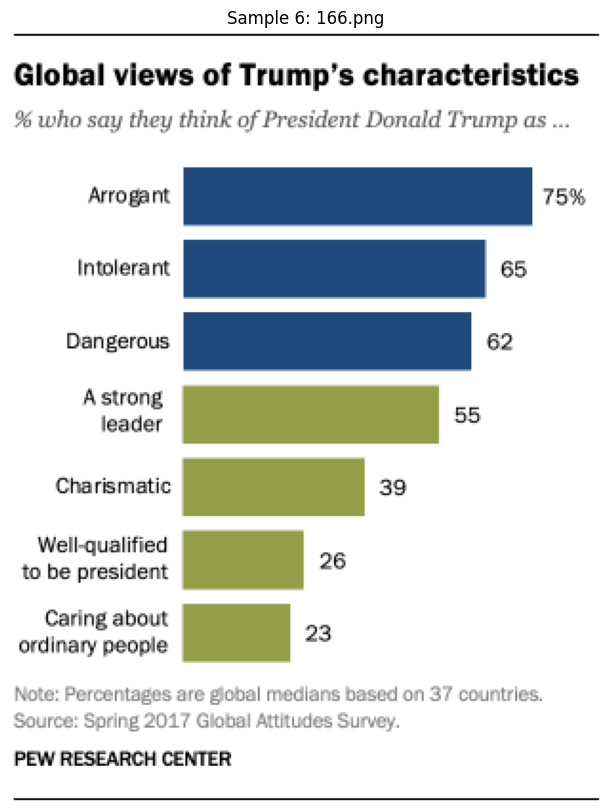

In [31]:
inspect_sample(i)
i+=1